In [3]:
import pandas as pd

In [4]:
# (1) Используя параметры pandas прочитать красиво пандас (подвох что заголовки - первые 2 линии)
df = pd.read_csv('default_of_credit_card_clients.csv',sep=';', skiprows=[0]) #TODO

In [5]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
# (2) выведите, что за типы переменных, сколько пропусков,
# для численных значений посчитайте пару статистик (в свободной форме)
df.info()

In [ ]:
#TODO
df.describe()


In [46]:
# (3) посчитать число женщин с университетским образованием
# SEX (1 = male; 2 = female). 
# EDUCATION (1 = graduate school; 2 = university; 3 = high school; 4 = others). 

#TODO
df[(df['SEX']==2)&(df['EDUCATION']==2)].head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0


In [68]:
# (4) Сгрупировать по "default payment next month" и посчитать медиану для всех показателей начинающихся на BILL_ и PAY_
#TODO
df.groupby(by='default payment next month')[[x for x in df.columns if ('BILL' in x)|('PAY' in x)]].mean().T

default payment next month,0,1
PAY_0,-0.211222,0.668174
PAY_2,-0.301917,0.458258
PAY_3,-0.316256,0.362116
PAY_4,-0.355633,0.254521
PAY_5,-0.389488,0.167872
PAY_6,-0.405624,0.112116
BILL_AMT1,51994.227273,48509.162297
BILL_AMT2,49717.435670,47283.617842
BILL_AMT3,47533.365605,45181.598855
BILL_AMT4,43611.165254,42036.950573


In [66]:
# (5) постройте сводную таблицу (pivot table) по SEX, EDUCATION, MARRIAGE
pd.crosstab(df['SEX'], df['MARRIAGE'])



MARRIAGE,0,1,2,3
SEX,,,,
1,14,5190,6553,131
2,40,8469,9411,192


In [67]:
df.pivot_table(['SEX','EDUCATION','MARRIAGE'],['LIMIT_BAL'], aggfunc='sum').head() #TODO

,EDUCATION,MARRIAGE,SEX
LIMIT_BAL,,,
10000,1060,852,680
16000,7,2,3
20000,4136,3307,2842
30000,3420,2583,2627
40000,436,358,373


In [9]:
# (6) Создать новый строковый столбец в data frame-е, который:
# принимает значение A, если значение LIMIT_BAL <=10000
# принимает значение B, если значение LIMIT_BAL <=100000 и >10000
# принимает значение C, если значение LIMIT_BAL <=200000 и >100000
# принимает значение D, если значение LIMIT_BAL <=400000 и >200000
# принимает значение E, если значение LIMIT_BAL <=700000 и >400000
# принимает значение F, если значение LIMIT_BAL >700000

#TODO
test2=[]
for x in test2:
    if df['LIMIT_BAL']<=10000:
        test2[x]='A'
    elif df['LIMIT_BAL']<=100000:
        test2[x]='B'
    elif df['LIMIT_BAL']<=200000:
            test2[x]='C'
    elif df['LIMIT_BAL']<=400000:
                test2[x]='D'
    elif df['LIMIT_BAL']<=700000:
                    test[x]='E'
    else: test2[x]='F'
df.insert(loc=len(df.columns), column='New_Column', value=test2)
df.head

ValueError: Length of values does not match length of index

In [11]:
%matplotlib inline

In [ ]:
# (7) постироить распределение LIMIT_BAL (гистрограмму)

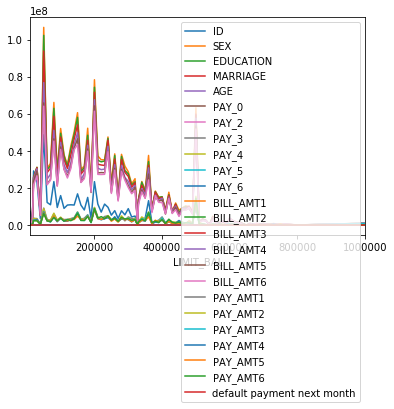

In [12]:
df.groupby('LIMIT_BAL').sum().plot()

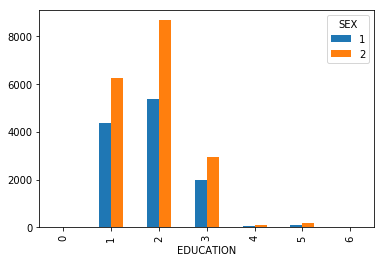

In [65]:
# (8) построить зависимость кредитного лимита от образования для каждого пола
# график необходимо сделать очень широким (на весь экран)
df #TODO

In [66]:
# (9) построить зависимость кредитного лимита и образования только для одного из полов

#TODO

In [13]:
# (10) построить большой график (подсказка - используя seaborn) для построения завимисости всех возможных пар параметров
# разным цветом выделить разные значение "default payment next month"
# (но так как столбцов много - картинка может получиться "монструозной")
# (поэкспериментируйте над тем как построить подобное сравнение параметров)
# (подсказка - ответ может состоять из несколькольких графиков)
# (если не выйдет - программа минимум - построить один график со всеми параметрами)
import seaborn

#TODO

In [17]:


df.savefig('pairplot.png')

AttributeError: 'DataFrame' object has no attribute 'savefig'